In [1]:
import os
import pandas as pd
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sb  
%matplotlib inline

In [2]:
DATAPATH = '../../datasets/'
pd_data = pd.read_csv(os.path.join(DATAPATH, 'ex1data2.txt'), header=None, names=['Size', 'Bedrooms', 'Price'])

In [3]:
pd_data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### feature normalization

In [6]:
data = (pd_data - pd_data.mean())/pd_data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [11]:
def computeCost(X, y, theta):
    inner = np.power(((X* theta.T) - y),2)
    return np.sum(inner)/(2*len(X))

In [7]:
#define gradient descent function
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [9]:
# add ones column
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X2 = data.iloc[:,0:cols-1]  
y2 = data.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  
theta2 = np.matrix(np.array([0,0,0])) 

In [12]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2) 

0.13070336960771892

Text(0.5,1,'Error vs. Training Epoch')

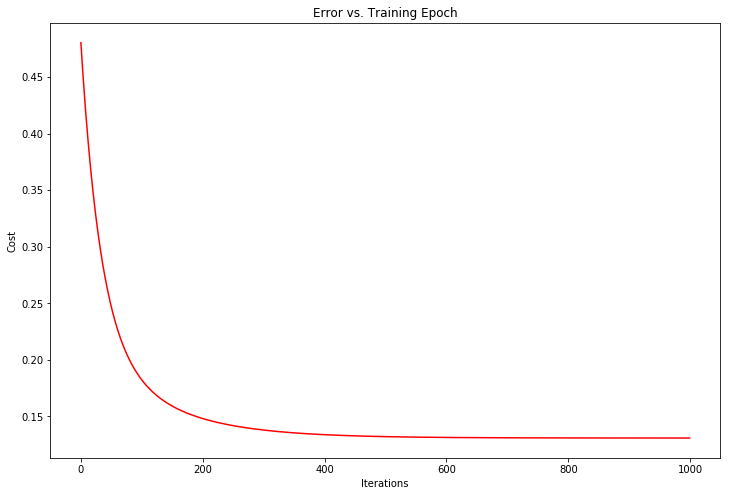

In [13]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

### Using sklearn

In [15]:
from sklearn import linear_model  
model = linear_model.LinearRegression()  
model.fit(X2, y2) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/srikanth_m07/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


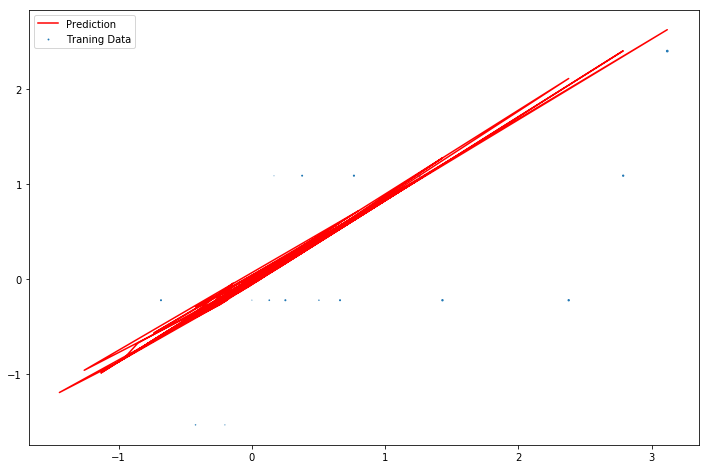

In [21]:
x = np.array(X2[:,1].A1)  
f = model.predict(X2).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Size, data.Bedrooms, data.Price, label='Traning Data')  
ax.legend(loc=2)  
#ax.set_xlabel('Population')  
#ax.set_ylabel('Profit')  
#ax.set_title('Predicted Profit vs. Population Size') 